In [1]:
import pandas as pd
import numpy as np

# Read the data
PII_hearttable = pd.read_csv('data/dev_sample_HeartTable_10_17_2022.csv')
agr_demo = pd.read_csv('data/cf_agrAppend_va2_10_14_2022.csv')

C:\Users\cayde\AppData\Local\Temp\ipykernel_15772\3157121903.py:6: DtypeWarning: Columns (12,66) have mixed types. Specify dtype option on import or set low_memory=False.
  agr_demo = pd.read_csv('data/cf_agrAppend_va2_10_14_2022.csv')


In [2]:

# need to add a class flag to the PII_hearttable

# using regex count the number of times the substring "agr" appears in the column 'source_id'
# PII_hearttable['source_id'].str.count('agr').sum()

# if the coulumn 'source_id' contains the substring "agr" then the class is 1 else 2
PII_hearttable['is_suicide'] = np.where(PII_hearttable['source_id'].str.contains('agr'), 0, 1)

In [3]:
# need to drop all non predictive pii info as it wont help the model.
# only keep columns 'source_id' and 'is_suicide' from dataset pii_hearttable
PII_hearttable = PII_hearttable[['source_id', 'is_suicide']]


In [4]:
# adding label to each dataset so we can look at correlation between predictors and label

# grab the column 'is_suicide' from 'PII_hearttable'
is_suicide_vec = PII_hearttable['is_suicide']

# add 'is_suicide_vec' vector to the 'agr_demo' dataframe
agr_demo['is_suicide'] = is_suicide_vec


In [5]:
# drop the columns 'PK', 'FIRST_NAME', 'LAST_NAME', 'MASTER_DOB', 'ADDRESS', 'CITY', 'STATE', 'ZIP'
agr_demo = agr_demo.drop(['PK', 'AGRID','AGRID20','AGRID15','AGRID16', 'FIRST NAME', 'LAST NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'BARCODE', 'COUNTY', 'ADDRESS TYPE'], axis=1)

In [6]:
# in this code block i will be trying to impute the missing values in the dataset attribute by attribute.
# get the percentage of missing values in each column
print(agr_demo.isnull().sum() / len(agr_demo))

source_id                     0.000000
COA_DATE                      0.990453
DPV                           0.000000
SCF                           0.004124
VACANT                        0.110668
NO STAT                       0.110668
RESIDENTIAL                   0.110623
MOVED_CD                      0.995876
ANK                           0.995518
ORIG_ADDRESS                  0.002376
ORIG_CITY                     0.004437
ORIG_STATE                    0.001165
ORIG_ZIP                      0.093232
NCOA DATE                     0.000000
MOVETYPE                      0.990453
AGR_RECORD                    0.000000
MASTER_DOB                    0.000000
AGR_DOB                       0.496638
CLIENT_DOB                    0.448229
DEMO MATCH                    0.488660
PROP MATCH                    0.536979
IL_SCORE_AGR                  0.501524
MATCH IL                      0.501524
DEMO_TYPE OF DWELLING         0.572882
DEMO_ESTIMATED INCOME         0.572882
DEMO_OWN OR RENT         

In [7]:
# drop the column 'COA_DATE' as 99% of it is missing
agr_demo = agr_demo.drop(['COA_DATE'], axis=1)

In [8]:
# DPV
# desc: Delivery Point Validation - 1 = Deliverable; 0 = Undeliverable
# binary 100% filled do not touch

# Drop DPV
agr_demo = agr_demo.drop(['DPV'], axis=1)

In [9]:
#SCF
# need to figure out what this is will probs drop
# string 3 long

# drop SCF
agr_demo = agr_demo.drop(['SCF'], axis=1)

In [10]:
# VACANT
# desc: Vacant 1 = Vacant (not receiving mail at this time)

# how many null values in 'VACANT' column
print(agr_demo['VACANT'].isnull().sum())
# expressed as a percentage with nice formatting 
print('{:.2%}'.format(agr_demo['VACANT'].isnull().sum()/len(agr_demo)))

# fill the null values in 'VACANT' with 0
agr_demo['VACANT'] = agr_demo['VACANT'].fillna(0)

print("after filling null values in 'VACANT' column")

# how many null values in 'VACANT' column
print(agr_demo['VACANT'].isnull().sum())
# expressed as a percentage with nice formatting 
print('{:.2%}'.format(agr_demo['VACANT'].isnull().sum()/len(agr_demo)))

2469
11.07%
after filling null values in 'VACANT' column
0
0.00%


In [11]:
# 'NO STAT'
# desc:

#how many null values in 'NO STAT' column
print(agr_demo['NO STAT'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['NO STAT'].isnull().sum()/len(agr_demo)))

# fill the null values in 'NO STAT' with 0
agr_demo['NO STAT'] = agr_demo['NO STAT'].fillna(0)

print("after filling null values in 'NO STAT' column")

# how many null values in 'NO STAT' column
print(agr_demo['NO STAT'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['NO STAT'].isnull().sum()/len(agr_demo)))

2469
11.07%
after filling null values in 'NO STAT' column
0
0.00%


In [12]:
# # 'ADDRESS TYPE'
# # desc: High Rise; PO Box; Rural/Highway; Street
# # consider dropping this if it is seen as non predictive as i dont think it will lend much to the model
# # string

# # how many null values in 'ADDRESS TYPE' column
# print(agr_demo['ADDRESS TYPE'].isnull().sum())
# # expressed as a percentage with nice formatting
# print('{:.2%}'.format(agr_demo['ADDRESS TYPE'].isnull().sum()/len(agr_demo)))

# # drop 'ADDRESS TYPE'
# agr_demo = agr_demo.drop(['ADDRESS TYPE'], axis=1)


In [13]:
# 'RESIDENTIAL'
# boolean y or n 

# how many null values in 'RESIDENTIAL' column
print(agr_demo['RESIDENTIAL'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['RESIDENTIAL'].isnull().sum()/len(agr_demo)))

# fill the null values in 'RESIDENTIAL' with 0
agr_demo['RESIDENTIAL'] = agr_demo['RESIDENTIAL'].fillna(0)

print("after filling null values in 'RESIDENTIAL' column")

# how many null values in 'RESIDENTIAL' column
print(agr_demo['RESIDENTIAL'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['RESIDENTIAL'].isnull().sum()/len(agr_demo)))

# convert all the values in 'RESIDENTIAL' to 'Y' = 1 or 'N' = 0
agr_demo['RESIDENTIAL'] = np.where(agr_demo['RESIDENTIAL'] == 'Y', 1, 0)

2468
11.06%
after filling null values in 'RESIDENTIAL' column
0
0.00%


In [14]:
# 'MOVED_CD'  
# desc: ADDRESS = Moved no forwarding address; PO BOX = PO Box closed 
# catergorical. needs 1 hot encoding. can probs drop this as it is not predictive

# how many null values in 'MOVED_CD' column
print(agr_demo['MOVED_CD'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['MOVED_CD'].isnull().sum()/len(agr_demo)))

# drop the column 'MOVED_CD' as 99% of it is missing
agr_demo = agr_demo.drop(['MOVED_CD'], axis=1)

22218
99.59%


In [15]:
# 'ANK'   
# desc:
# catergorical. needs 1 hot encoding. can probs drop this as it is not predictive

# how many null values in 'ANK' column
print(agr_demo['ANK'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['ANK'].isnull().sum()/len(agr_demo)))

# drop the column 'ANK' as 99% of it is missing
agr_demo = agr_demo.drop(['ANK'], axis=1)

22210
99.55%


In [16]:
# drop 'ORIG_ADDRESS', 'ORIG_CITY', 'ORIG_STATE', 'ORIG_ZIP' as they are not predictive
agr_demo = agr_demo.drop(['ORIG_ADDRESS', 'ORIG_CITY', 'ORIG_STATE', 'ORIG_ZIP'], axis=1)

# drop 'NCOA_DATE' as it is not predictive
# desc: Date record sent through NCOA verification
agr_demo = agr_demo.drop(['NCOA DATE'], axis=1)


In [17]:
# 'MOVETYPE'
# desc: F = recent move was FAMILY move; I = recent move was INDIVIDUAL move
# catergorical. needs 1 hot encoding. can probs drop this as it is not predictive

# how many null values in 'MOVETYPE' column
print(agr_demo['MOVETYPE'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['MOVETYPE'].isnull().sum()/len(agr_demo)))

# drop the column 'MOVETYPE' as 99% of it is missing
agr_demo = agr_demo.drop(['MOVETYPE'], axis=1)

22097
99.05%


In [18]:
# drop 'AGR_RECORD' as it is not predictive
# desc: Y = AGR PROVIDED RECORD; N = CLIENT PROVIDED RECORD
agr_demo = agr_demo.drop(['AGR_RECORD'], axis=1)

# drop 'MASTER_DOB', 'AGR_DOB', 'CLIENT_DOB'
agr_demo = agr_demo.drop(['MASTER_DOB', 'AGR_DOB', 'CLIENT_DOB'], axis=1)

# drop 'DEMO MATCH','PROP MATCH','IL_SCORE_AGR','MATCH IL'
agr_demo = agr_demo.drop(['DEMO MATCH','PROP MATCH','IL_SCORE_AGR','MATCH IL'], axis=1)



In [19]:
# 'DEMO_TYPE OF DWELLING'
# desc: S = Single Family Dwelling Unit; M = Multiple Family Dwelling Unit; U = Unknown
# catergorical. needs 1 hot encoding.

# how many null values in 'DEMO_TYPE OF DWELLING' column
print(agr_demo['DEMO_TYPE OF DWELLING'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['DEMO_TYPE OF DWELLING'].isnull().sum()/len(agr_demo)))

# change the 'U' = unknown to nan
agr_demo['DEMO_TYPE OF DWELLING'] = agr_demo['DEMO_TYPE OF DWELLING'].replace('U', np.nan)

# 1 hot encode the column 'DEMO_TYPE OF DWELLING'
agr_demo = pd.get_dummies(agr_demo, columns=['DEMO_TYPE OF DWELLING'])

12781
57.29%


In [20]:
# 'DEMO_ESTIMATED INCOME'
# Desc: Values:
# A = Under $10,000
# B = $10,000 - $14,999
# C = $15,000 - $19,999
# D = $20,000 - $24,999
# E = $25,000 - $29,999
# F = $30,000 - $34,999
# G = $35,000 - $39,999
# H =  $40,000 - $44,999
# I = $45,000 - $49,999
# J = $50,000 - $54,999
# K = $55,000 - $59,999
# L = $60,000 - $64,999
# M = $65,000 - $74,999
# N = $75,000 - $99,999
# O = $100,000 - $149,999
# P = $150,000 - $174,999
# Q = $175,000 - $199,999
# R = $200,000 - $249,999
# S = $250,000 Plus
# catergorical. needs 1 hot encoding.

#need to resize these categories as. Static discretization with no meaning behind it is rather naive and usually not the best approach. Also need to reduce degrees anywhere possible to make things more simplistic. 
#instead will resize to tax brackets. using the numbers as found here https://www.nerdwallet.com/article/taxes/federal-income-tax-brackets
# A = Under $10,000 
# B = $10,000 - $40,000
# C = $40,000 - $90,000
# D = $90,000 - $170,000
# E = $170,000 - $215,000
# F = $215,000 - $540,000
# G = $540,000 Plus

agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('A', 'A')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('B', 'B')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('C', 'B')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('D', 'B')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('E', 'B')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('F', 'B')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('G', 'B')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('H', 'C')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('I', 'C')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('J', 'C')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('K', 'C')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('L', 'C')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('M', 'C')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('N', 'D')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('O', 'D')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('P', 'D')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('Q', 'E')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('R', 'F')
agr_demo['DEMO_ESTIMATED INCOME'] = agr_demo['DEMO_ESTIMATED INCOME'].replace('S', 'F')


# how many null values in 'DEMO_ESTIMATED INCOME' column
print(agr_demo['DEMO_ESTIMATED INCOME'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['DEMO_ESTIMATED INCOME'].isnull().sum()/len(agr_demo)))

# 1 hot encode the column 'DEMO_ESTIMATED INCOME'
agr_demo = pd.get_dummies(agr_demo, columns=['DEMO_ESTIMATED INCOME'])


12781
57.29%


In [21]:
# 'DEMO_OWN OR RENT'
# catergorical. needs 1 hot encoding.

# how many null values in 'DEMO_OWN OR RENT' column
print(agr_demo['DEMO_OWN OR RENT'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['DEMO_OWN OR RENT'].isnull().sum()/len(agr_demo)))

# change the 'U' = unknown to nan
agr_demo['DEMO_OWN OR RENT'] = agr_demo['DEMO_OWN OR RENT'].replace('U', np.nan)

# 1 hot encode the column 'DEMO_OWN OR RENT'
agr_demo = pd.get_dummies(agr_demo, columns=['DEMO_OWN OR RENT'])

12781
57.29%


In [22]:
# 'DEMO_CHILDREN'
# catergorical. change to binary.

# how many null values in 'DEMO_CHILDREN' column
print(agr_demo['DEMO_CHILDREN'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['DEMO_CHILDREN'].isnull().sum()/len(agr_demo)))

# change the 'U' = unknown to nan
agr_demo['DEMO_CHILDREN'] = agr_demo['DEMO_CHILDREN'].replace('U', np.nan)

# 1 hot encode the column 'DEMO_CHILDREN'
agr_demo = pd.get_dummies(agr_demo, columns=['DEMO_CHILDREN'])

12781
57.29%


In [23]:
# 'DEMO_MARITAL STATUS'
# catergorical. needs 1 hot encoding.

# how many null values in 'DEMO_MARITAL STATUS' column
print(agr_demo['DEMO_MARITAL STATUS'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['DEMO_MARITAL STATUS'].isnull().sum()/len(agr_demo)))

# change the 'U' = unknown to nan
agr_demo['DEMO_MARITAL STATUS'] = agr_demo['DEMO_MARITAL STATUS'].replace('U', np.nan)

# 1 hot encode the column 'DEMO_MARITAL STATUS'
agr_demo = pd.get_dummies(agr_demo, columns=['DEMO_MARITAL STATUS'])

12781
57.29%


In [24]:
# 'DEMO_EDUCATION LEVEL'
# catergorical. needs 1 hot encoding.

# how many null values in 'DEMO_EDUCATION LEVEL' column
print(agr_demo['DEMO_EDUCATION LEVEL'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['DEMO_EDUCATION LEVEL'].isnull().sum()/len(agr_demo)))

# change the 'U' = unknown to nan
agr_demo['DEMO_EDUCATION LEVEL'] = agr_demo['DEMO_EDUCATION LEVEL'].replace('U', np.nan)

# 1 hot encode the column 'DEMO_EDUCATION LEVEL'
agr_demo = pd.get_dummies(agr_demo, columns=['DEMO_EDUCATION LEVEL'])


12781
57.29%


In [25]:
# 'DEMO_CREDIT RATING' 
# catergorical. needs 1 hot encoding.

# how many null values in 'DEMO_CREDIT RATING' column
print(agr_demo['DEMO_CREDIT RATING'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['DEMO_CREDIT RATING'].isnull().sum()/len(agr_demo)))

# 1 hot encode the column 'DEMO_CREDIT RATING'
agr_demo = pd.get_dummies(agr_demo, columns=['DEMO_CREDIT RATING'])

12781
57.29%


In [26]:
# DEMO_VETERAN PRESENT IN HH
# boolean.

# how many null values in 'DEMO_VETERAN PRESENT IN HH' column
print(agr_demo['DEMO_VETERAN PRESENT IN HH'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['DEMO_VETERAN PRESENT IN HH'].isnull().sum()/len(agr_demo)))

#change Y to 1 and U to 0
agr_demo['DEMO_VETERAN PRESENT IN HH'] = agr_demo['DEMO_VETERAN PRESENT IN HH'].replace('Y', 1)
agr_demo['DEMO_VETERAN PRESENT IN HH'] = agr_demo['DEMO_VETERAN PRESENT IN HH'].replace('U', 0)

#change nan to 0
agr_demo['DEMO_VETERAN PRESENT IN HH'] = agr_demo['DEMO_VETERAN PRESENT IN HH'].fillna(0)

# how many null values in 'DEMO_VETERAN PRESENT IN HH' column
print(agr_demo['DEMO_VETERAN PRESENT IN HH'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['DEMO_VETERAN PRESENT IN HH'].isnull().sum()/len(agr_demo)))

12781
57.29%
0
0.00%


In [27]:
# drop 'PDLLF','PDLSF','CREDIT REPAIR','DEBT CONSOLIDATION'
agr_demo = agr_demo.drop(['PDLLF','PDLSF','CREDIT REPAIR','DEBT CONSOLIDATION'], axis=1)

20514
91.95%


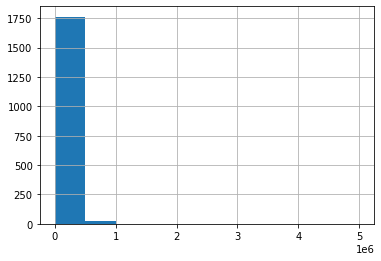

In [28]:
# 'LOAN AMOUNT 1'
# numerical. 90% missing values. try to run a model with just the 10% that have values and see if feature importance is high.

# how many null values in 'LOAN AMOUNT 1' column
print(agr_demo['LOAN AMOUNT 1'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['LOAN AMOUNT 1'].isnull().sum()/len(agr_demo)))

# what is the distribution of 'LOAN AMOUNT 1'
agr_demo['LOAN AMOUNT 1'].hist()

# drop 'LOAN AMOUNT 1'
agr_demo = agr_demo.drop(['LOAN AMOUNT 1'], axis=1)




In [29]:
# drop 'LOAN DATE 1', 'LOAD RECORDING DATE 1'
agr_demo = agr_demo.drop(['LOAD DATE 1', 'LOAD RECORDING DATE 1'], axis=1)


17889
80.18%
1.0


<AxesSubplot:>

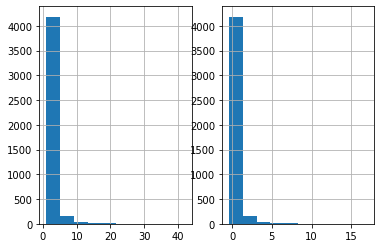

In [30]:
# 'MULTIPLE PROPERTIES COUNT'
# numerical. needs to be standardized.

# how many null values in 'MULTIPLE PROPERTIES COUNT' column
print(agr_demo['MULTIPLE PROPERTIES COUNT'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['MULTIPLE PROPERTIES COUNT'].isnull().sum()/len(agr_demo)))

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2)

# make a copy of multiple properties count
copy = agr_demo['MULTIPLE PROPERTIES COUNT'].copy()

# what is the distribution of 'MULTIPLE PROPERTIES COUNT'
copy.hist(ax = axes[0])

# what is the median of 'MULTIPLE PROPERTIES COUNT'
print(agr_demo['MULTIPLE PROPERTIES COUNT'].median())

# fill in the null values with the median #### not sure if this is appropriate as 80% of data is missing 
# agr_demo['MULTIPLE PROPERTIES COUNT'] = agr_demo['MULTIPLE PROPERTIES COUNT'].fillna(agr_demo['MULTIPLE PROPERTIES COUNT'].median())

# standardize the column 'MULTIPLE PROPERTIES COUNT'
agr_demo['MULTIPLE PROPERTIES COUNT'] = (agr_demo['MULTIPLE PROPERTIES COUNT'] - agr_demo['MULTIPLE PROPERTIES COUNT'].mean()) / agr_demo['MULTIPLE PROPERTIES COUNT'].std()

# i dont this seperate hist is working figure out a way to do this later
# create a second seperate histogram for 'MULTIPLE PROPERTIES COUNT' to see the effect of standardization
agr_demo['MULTIPLE PROPERTIES COUNT'].hist(ax = axes[1])




In [31]:
# drop 'MULTIPLE PROPERTIES FLAG' its redundant with 'MULTIPLE PROPERTIES COUNT'
agr_demo = agr_demo.drop(['MULTIPLE PROPERTIES FLAG'], axis=1)

In [32]:
# 'OWNER OCCUPIED STATUS'  
# catergorical.

# how many null values in 'OWNER OCCUPIED STATUS' column
print(agr_demo['OWNER OCCUPIED STATUS'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['OWNER OCCUPIED STATUS'].isnull().sum()/len(agr_demo)))

# 1 hot encode the column 'OWNER OCCUPIED STATUS'
agr_demo = pd.get_dummies(agr_demo, columns=['OWNER OCCUPIED STATUS'])



17889
80.18%


In [33]:
# 'OWNER STATUS TYPE' 
# catergorical.

# 1 hot encode the column 'OWNER STATUS TYPE'
agr_demo = pd.get_dummies(agr_demo, columns=['OWNER STATUS TYPE'])

In [34]:
# drop 'OWNERSHIP_START_DATE'
agr_demo = agr_demo.drop(['OWNERSHIP START DATE'], axis=1)

In [35]:
# 'PROPERTY TYPE DESC'
# catergorical.

# 1 hot encode the column 'PROPERTY TYPE DESC'
agr_demo = pd.get_dummies(agr_demo, columns=['PROPERTY TYPE DESC'])

In [36]:
# 'PURCHASE PRICE'
# numerical.  92% missing values. try to run a model with just the 8% that have values and see if feature importance is high. for now drop it. dont standardize it.

# how many null values in 'PURCHASE PRICE' column
print(agr_demo['PURCHASE PRICE'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['PURCHASE PRICE'].isnull().sum()/len(agr_demo)))

# dont think is appropriate to backfill here as 92% of data is missing

# # standardize the column 'PURCHASE PRICE'
# agr_demo['PURCHASE PRICE'] = (agr_demo['PURCHASE PRICE'] - agr_demo['PURCHASE PRICE'].mean()) / agr_demo['PURCHASE PRICE'].std()

# drop 'PURCHASE PRICE'
agr_demo = agr_demo.drop(['PURCHASE PRICE'], axis=1)

20732
92.93%


In [37]:
# drop 'PURCHASE RECORDING DATE', PURCHASE SALE DATE
agr_demo = agr_demo.drop(['PURCHASE RECORDING DATE', 'PURCHASE SALE DATE'], axis=1)

In [38]:
# BANKRUPCY
# boolean.

# how many null values in 'BANKRUPCY' column
print(agr_demo['BANKRUPCY'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['BANKRUPCY'].isnull().sum()/len(agr_demo)))

# change Y to 1
agr_demo['BANKRUPCY'] = agr_demo['BANKRUPCY'].replace('Y', 1)
# change nan to 0
agr_demo['BANKRUPCY'] = agr_demo['BANKRUPCY'].fillna(0)

# how many null values in 'BANKRUPCY' column
print(agr_demo['BANKRUPCY'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['BANKRUPCY'].isnull().sum()/len(agr_demo)))

21990
98.57%
0
0.00%


In [39]:
# drop 'BANKRUPTCY DATE', 'BANKRUPTCY STATUS'
agr_demo = agr_demo.drop(['BANKRUPTCY DATE', 'BANKRUPTCY STATUS'], axis=1)

In [40]:
# 'DUI'
# boolean.

# how many null values in 'DUI' column
print(agr_demo['DUI'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['DUI'].isnull().sum()/len(agr_demo)))

# change Y to 1
agr_demo['DUI'] = agr_demo['DUI'].replace('Y', 1)
# change nan to 0
agr_demo['DUI'] = agr_demo['DUI'].fillna(0)

# how many null values in 'DUI' column
print(agr_demo['DUI'].isnull().sum())
# expressed as a percentage with nice formatting
print('{:.2%}'.format(agr_demo['DUI'].isnull().sum()/len(agr_demo)))

22060
98.88%
0
0.00%


In [41]:
# drop 'SEX OFFENDER DATE'
agr_demo = agr_demo.drop(['SEX OFFENDER DATE'], axis=1)

# SEX OFFENDER
# boolean.

print(agr_demo['SEX OFFENDER'].isnull().sum())
print('{:.2%}'.format(agr_demo['SEX OFFENDER'].isnull().sum()/len(agr_demo)))

agr_demo['SEX OFFENDER'] = agr_demo['SEX OFFENDER'].replace('Y', 1)
agr_demo['SEX OFFENDER'] = agr_demo['SEX OFFENDER'].fillna(0)

print(agr_demo['SEX OFFENDER'].isnull().sum())
print('{:.2%}'.format(agr_demo['SEX OFFENDER'].isnull().sum()/len(agr_demo)))


22304
99.97%
0
0.00%


In [42]:
print(agr_demo.isnull().sum() / len(agr_demo))

source_id                     0.000000
VACANT                        0.000000
NO STAT                       0.000000
RESIDENTIAL                   0.000000
DEMO_VETERAN PRESENT IN HH    0.000000
MULTIPLE PROPERTIES COUNT     0.801838
BANKRUPCY                     0.000000
DUI                           0.000000
SEX OFFENDER                  0.000000
DIGITAL FLAG                  0.979068
is_suicide                    0.000090
DEMO_TYPE OF DWELLING_M       0.000000
DEMO_TYPE OF DWELLING_S       0.000000
DEMO_ESTIMATED INCOME_A       0.000000
DEMO_ESTIMATED INCOME_B       0.000000
DEMO_ESTIMATED INCOME_C       0.000000
DEMO_ESTIMATED INCOME_D       0.000000
DEMO_ESTIMATED INCOME_E       0.000000
DEMO_ESTIMATED INCOME_F       0.000000
DEMO_ESTIMATED INCOME_U       0.000000
DEMO_OWN OR RENT_O            0.000000
DEMO_OWN OR RENT_R            0.000000
DEMO_CHILDREN_N               0.000000
DEMO_CHILDREN_Y               0.000000
DEMO_MARITAL STATUS_A         0.000000
DEMO_MARITAL STATUS_B    

In [43]:
# drop 'is_suicide'
agr_demo = agr_demo.drop(columns='is_suicide')

In [44]:
# write the cleaned data to a csv file
agr_demo.to_csv('data/out/agr_demo_cleaned_v1.csv', index=False)